Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

Data

In [4]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Visualise Examples

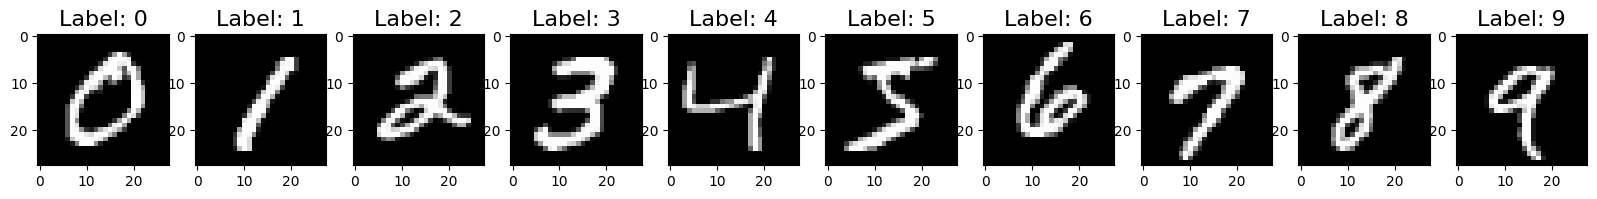

In [12]:
num_classes = 10
fig, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='grey')
    ax[i].set_title("Label: {}".format(i), fontsize=16)

In [13]:
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [14]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [15]:
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Prepare Data

In [16]:
#Normalise Data
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
#Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


Create Model - Fully Connected Neural Network

In [12]:
model = keras.models.Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Train

In [13]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5805 - loss: 22.4297
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8350 - loss: 1.4660
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8605 - loss: 0.6453
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8884 - loss: 0.4370
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9065 - loss: 0.3449
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9211 - loss: 0.2873
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9294 - loss: 0.2482
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9387 - loss: 0.2093
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9420 - loss: 0.1926
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9472 - loss: 0.1739


Evaluate

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.9416 - loss: 0.2495
Test Loss: 0.21611501276493073, Test Accuracy: 0.9488000273704529


In [15]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step
[[2.1962082e-29 1.9959051e-22 2.0940592e-13 ... 1.0000000e+00
  1.2896941e-17 1.5122347e-17]
 [3.3372092e-15 4.1620709e-07 9.9999952e-01 ... 6.5709196e-19
  1.3771321e-15 8.2995820e-18]
 [2.4108512e-12 1.0000000e+00 1.7453751e-10 ... 2.4465648e-13
  3.5034853e-10 1.3767401e-13]
 ...
 [2.1762038e-08 1.0664915e-09 1.4237838e-06 ... 2.8457670e-04
  7.3488365e-04 7.6434888e-02]
 [9.8574198e-28 1.1241334e-22 4.6901033e-18 ... 1.0598899e-18
  2.5405865e-17 7.5343714e-20]
 [4.8229324e-25 2.1470110e-22 1.3871802e-10 ... 7.6953001e-18
  4.1445351e-16 1.2731229e-18]]
[7 2 1 ... 4 5 6]


Single Example

(10000,)


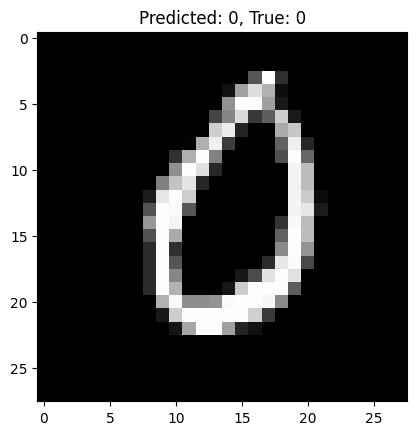

In [52]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_test = y_test.reshape(-1,1)
y_true = np.argmax(y_test, axis=1)
print(y_true.shape)
y_sample_true = np.argmax(y_true, axis=0)
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true, fontsize=16))
plt.imshow(x_sample.reshape(28, 28), cmap='grey')